In [1]:
import requests
import base64
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np

In [24]:
def sketch_batch(img_paths):
    target_url = "http://localhost:8982/sketch"
    
    dict = {}
    dict['img_path'] = img_paths
    
    output_path = []
    for path in img_paths:
        temp_path = "/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/"
        dst = temp_path + path.split("/")[-1][:-4] + '.png'
        output_path.append(dst)
    dict['output_path'] = output_path
    print(output_path)

    response = requests.post(target_url, data=json.dumps(dict))

    lists = json.loads(response.text)
#     jpg_original = base64.b64decode(lists)
#     jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
#     img = cv2.imdecode(jpg_as_np, flags=1)
    
    return lists

In [2]:
def sketch_ori(img_path):
    target_url = "http://localhost:8899/sketch"

#     print(img_path)
    
    dict = {}
    dict['img_path'] = img_path

    response = requests.post(target_url, data=json.dumps(dict))

    data = json.loads(response.text)
    if 'output_path' in data:
        output_path = data['output_path']

    return output_path

In [11]:
img_paths = impath[:10]
output_path = []
for path in img_paths:
    print(path.split("/")[-1])
    temp_path = "/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/"
    dst = temp_path + path.split("/")[:-1]
    output_path.append(dst)
output_path

807173H01_1_21-TH-06-523_0300.jpg


TypeError: can only concatenate str (not "list") to str

In [35]:
import glob

impath = glob.glob("/home/ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/faces/original/**/*.jpg")

res = sketch_batch(impath[:10])


# img_path = sketch_ori(input_path)
# img = cv2.imread(img_path)
# plt.imshow(img)
# plt.show()
# cv2.imwrite('refined_data/bj1_sk2.png', img)
# plt.imshow(img)
# plt.show()
# lists

['/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0300.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0330.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0360.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0390.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0420.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0480.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807173H01_1_21-TH-06-523_0510.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807141H01_1_21-TH-06-499_0000.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807141H01_1_21-TH-06-499_0030.png', '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/temp/807141H01_1_21-TH-06-499_0060.png']


In [19]:
res

{'output_path': []}

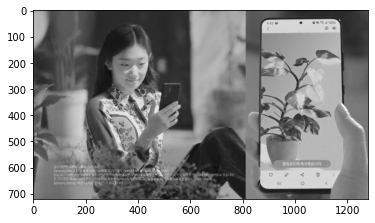

In [9]:
import cv2

img = cv2.imread(input_path)
b, g, r = cv2.split(img)
zero = np.zeros(b.shape)

# merge = cv2.merge((r, zero, zero))

cv2.imwrite("testb.png", r)

img_b = cv2.imread("testb.png")
plt.imshow(img_b)
plt.show()
# print(b.shape, zero.shape)
# display it
# cv2.imshow("frame", img)
# cv2.waitKey(0)

In [ ]:
def sketch_thick(img_path):
    target_url = "http://localhost:8899/sketch_thick"

#     print(img_path)
    
    dict = {}
    dict['path'] = img_path

    response = requests.post(target_url, data=json.dumps(dict))

    data = json.loads(response.text)
    if 'output_path' in data:
        src = data['output_path']

        img = cv2.imread(src)

        return img, src
    return None, None
def sketch_thin(img_path):
    target_url = "http://localhost:8899/sketch_thin"

    dict = {}
    dict['path'] = img_path

    response = requests.post(target_url, data=json.dumps(dict))

    data = json.loads(response.text)
    if 'output_path' in data:
        src = data['output_path']

        img = cv2.imread(src)

        return img, src
    return None, None

In [ ]:
def img_to_imgpath(img):
    path = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/test_post.png'
    cv2.imwrite(path, img)
    
    return path

In [ ]:
def cartoonize(img):
    target_url = "http://localhost:8894/predict"

    _, img_encoded = cv2.imencode('.jpg', img, params=[cv2.IMWRITE_JPEG_QUALITY, 50])
    img = cv2.imdecode(img_encoded, 1)
    # send http request with image and receive response
    jpg_as_text = base64.b64encode(img_encoded).decode()
    dict = {}
    dict['image'] = jpg_as_text

    response = requests.post(target_url, data=json.dumps(dict))

    lists = json.loads(response.text)
    jpg_original = base64.b64decode(lists[0]['image'])
    jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)

    path = img_to_imgpath(img)
    
    return img, path

In [ ]:
def remove_bg(img_path):
    target_url = "http://localhost:8895/remove_bg"

    dict = {}
    dict['img_path'] = img_path
    
    response = requests.post(target_url, data=json.dumps(dict))
#     print(response.text)
    data = json.loads(response.text)
#     print(data)

    img = cv2.imread(data)
    return img, data

In [18]:
import os
import shutil
import glob

ori_path = glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/sample/all_sample/*.png")
# dst_path = glob.glob("/home/ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/faces/original/**/*.jpg")
dst_path = glob.glob("/home/ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/**/*.jpg")
# ori_path = ['807124H01_1_21-TH-06-490_0810.png']
paths = []
for op in ori_path:
    paths.append(op.split('/')[-1])

for dp in dst_path:
    dst_file = dp.split('/')[-1][:-4] + '.png'
    if dst_file in paths:
        idx = paths.index(dst_file)
        src = ori_path[idx]
#         ori_img = cv2.imread(src)
#         dst_img = cv2.imread(dp)
        
        out_dir = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/sample/images/'
        if not os.path.isdir(out_dir):
            os.mkdir(out_dir)
#         img = cv2.imread(dp)
#         img, path = remove_bg(dp)
        
        dst = os.path.join(out_dir, dst_file[:-4] + '.jpg')
#         print(dp)
#         cv2.imwrite(dst, img)
        shutil.copy(dp, dst)

In [ ]:
ori_path = glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/trainset_comb/dataset_sk/*.png")

for path in ori_path:
    out_dir = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/trainset_comb/dataset_gt/'
    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)
        
    img = cv2.imread(path)
    img = 255 - img
    
    dst = os.path.join(out_dir, path.split('/')[-1])
    cv2.imwrite(dst, img)

In [ ]:
import glob
from PIL import Image
import numpy as np
import os
import cv2

# impath = glob.glob("/home/ubuntu/workspace/kobaco/dataset/data_processing/kobaco_keyframe/**/*.png")
impath = glob.glob("/home//ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/faces/original/**/*.jpg")
# impath = glob.glob("/home//ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/scene/**/*.jpg")
print(len(impath))
impath = impath[2000:]
# print(impath)
# impath = impath[1501:]
cnt = 0

for path in impath:
    output_dir_gt = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/dataset_affine2/gt_23/'
    if(not os.path.exists(output_dir_gt)):
        os.mkdir(output_dir_gt)
        
    output_dir_im = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/dataset_affine2/im_23/'
    if(not os.path.exists(output_dir_im)):
        os.mkdir(output_dir_im)

    dst = path.split('/')[-1]
    
    img = cv2.imread(path)
    
    img_nobg, path_nobg = remove_bg(path)

    img_nobg_sk, path_nobg_sk = sketch_thick(path_nobg)
    
#     if img_nobg_sk is None:
#         continue
#     plt.show()

    cv2.imwrite(output_dir_im + dst[:-4]+'.jpg', img_nobg)
    cv2.imwrite(output_dir_gt + dst[:-4]+'.png', img_nobg_sk)
    cnt+=1
    print(cnt,end='\r')
#     if cnt == 100:
#         break


In [ ]:
impath = glob.glob("/home//ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/scene/**/*.jpg")

In [ ]:
import glob
import os
from PIL import Image
import numpy as np
impath = glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/train_data/gt_draw/*.png")
for path in impath:
    output_dir = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/train_data/gt_draw_erode'
    if(not os.path.exists(output_dir)):
        os.mkdir(output_dir)
    
    dst = os.path.join(output_dir, path.split('/')[-1][:-4] + '.png')
    
    img = cv2.imread(path)

    k = np.ones((2,2), np.uint8)
    erosion = cv2.dilate(img, k)
    
#     erosion = 255 - erosion
    
    cv2.imwrite(dst, erosion)
    # plt.imshow(mask,cmap='gray')
    # plt.show()
    # plt.imshow(img)
    # plt.show()
    #     k = np.ones((2,2), np.uint8)
#     erosion = cv2.dilate(img_nobg_sk, k, iterations = 2)
#     k = np.ones((2,2), np.uint8)
#     erosion = cv2.erode(erosion, k)


    # 날카로움 연산 적용
#     blr = cv2.GaussianBlur(erosion, (0, 0), 2)
#     img_nobg_sk = np.clip(2.0*erosion - blr, 0, 255).astype(np.uint8)
    
#     plt.imshow(img)
#     plt.show()
#     plt.imshow(img_nobg)
#     plt.show()
#     plt.imshow(img_sk)
#     plt.show()
#     plt.imshow(img_nobg_sk)
#     plt.show()

In [ ]:
import glob
from PIL import Image
import numpy as np
import os
import cv2

# impath = glob.glob("/home/ubuntu/workspace/kobaco/dataset/data_processing/kobaco_keyframe/**/*.png")
impath = glob.glob("/home//ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/faces/original/**/*")
# impath = glob.glob("/home//ubuntu/workspace/kobaco/sketchy/U-2-Net/test_data/test_portrait_images/ori_im2_nobg_ct_sk_ct/*")
impath = impath[3500:]

cnt = 0
cnt2 = 0

for path in impath:

    output_dir_im= '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data_howon/im/'
    if(not os.path.exists(output_dir_im)):
        os.mkdir(output_dir_im)

    output_dir_im_nobg= '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data_howon/im_nobg/'
    if(not os.path.exists(output_dir_im_nobg)):
        os.mkdir(output_dir_im_nobg)        
        
    output_dir_gt = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data_howon/gt_nobg/'
    if(not os.path.exists(output_dir_gt)):
        os.mkdir(output_dir_gt)

    output_dir_gt_refined = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/refined_data_howon/gt_refined/'
    if(not os.path.exists(output_dir_gt_refined)):
        os.mkdir(output_dir_gt_refined)    


    dst = path.split('/')[-1]

    img = cv2.imread(path)

    img_nobg, path_nobg = remove_bg(path)

    cnt += 1
    print(cnt,end="\r")

#     if cnt == 2000:
#         break

    img_nobg_sk, path_nobg_sk = sketch_thick(path_nobg)

    if img_nobg_sk is None:
        continue

    img_gray = cv2.cvtColor(img_nobg_sk, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    ori_mask = mask.copy()


    contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    if len(contours) > 0:
        for cont in contours:
            area = cv2.contourArea(cont)
            if area < 100:
                cv2.fillPoly(mask, pts = [cont], color = (255,255,255))

    # mask = cv2.medianBlur(mask, 3)
    mask = cv2.GaussianBlur(mask, (0, 0), sigmaX=1.5, sigmaY=1.5, borderType = cv2.BORDER_DEFAULT)
    ret, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    contours, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    if len(contours) > 0:
        for cont in contours:
            area = cv2.contourArea(cont)
            if area < 5000:
                cv2.fillPoly(mask, pts = [cont], color = (0,0,0))

    k = np.ones((2,2), np.uint8)
    mask = cv2.dilate(mask, k, iterations = 1)

    cv2.imwrite(output_dir_im + dst, img)
    cv2.imwrite(output_dir_im_nobg + dst, img_nobg)
    cv2.imwrite(output_dir_gt + dst[:-4]+'.png', ori_mask)
    cv2.imwrite(output_dir_gt_refined + dst[:-4]+'_ori.png', mask)

In [386]:
from PIL import Image
import glob
import os
from IPython.display import clear_output

import cv2
import numpy as np
cnt=0
impath = glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/dataset_affine22_bg/*")
oripath = glob.glob("/home//ubuntu/workspace/kobaco/dataset/data_processing/kobaco_data/faces/original/**/*")
impath = impath[cnt:]
print(len(impath))

for path in impath:
    if cnt % 7 == 0:
    #     output_dir_im= '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/selected/im/'
    #     if(not os.path.exists(output_dir_im)):
    #         os.mkdir(output_dir_im)

        output_dir_gt = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/selected/sk_bg_22/'
        if(not os.path.exists(output_dir_gt)):
            os.mkdir(output_dir_gt)

        dst = path.split('/')[-1]

        area_size = 5000
        cnt += 1
        print(cnt, dst, end = '\r')
        img_cv = cv2.imread(path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
        ret, img_cv = cv2.threshold(img_cv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#         img_cv = 255 - img_cv
#         k = np.ones((2,2), np.uint8)
#         img_cv = cv2.dilate(img_cv, k, iterations = 1)
        
        img = Image.fromarray(img_cv)
        img.show()
        com = input()
        clear_output()
        if com =='s':
            img.save(output_dir_gt + dst[:-4] + '.png')
        elif com == 'z' or com == 'x' or com == 'c':
            while(1):
                img_cv = np.array(img)
                print("area_size:", area_size)

                ret, img_cv = cv2.threshold(img_cv, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                contours, hierarchy = cv2.findContours(img_cv, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
                if len(contours) > 0:
                    for cont in contours:
                        area = cv2.contourArea(cont)
                        if area < area_size:
                            cv2.fillPoly(img_cv, pts = [cont], color = (0,0,0))

                k = np.ones((2,2), np.uint8)
                img_cv = cv2.dilate(img_cv, k, iterations = 1)

                img_cv = Image.fromarray(img_cv)
                img_cv.show()
                com = input()
                clear_output()
                if com == 'z':
                    area_size -= 200
                elif com == 'x':
                    area_size += 200
                elif com == 'c':
                    print("input custom size.")
                    img_cv.show()
                    area_size = int(input())
                    clear_output()
                elif com == 's':
                    img_cv.save(output_dir_gt + dst[:-4] + '.png')
                    break
                elif com == 'q':
                    break
        elif com == 'o':
            for op in oripath:
                if op.split('/')[-1][:-4] == path.split('/')[-1][:-4]:
                    ori_img = Image.open(op)
                    break
            ori_img.show()
            com = input()
            
        else:
            continue
    else:
        cnt+=1
#         cv2.imwrite(output_dir_gt + dst[:-4] + '.png', img_nobg)
    

0


In [203]:
cnt=0

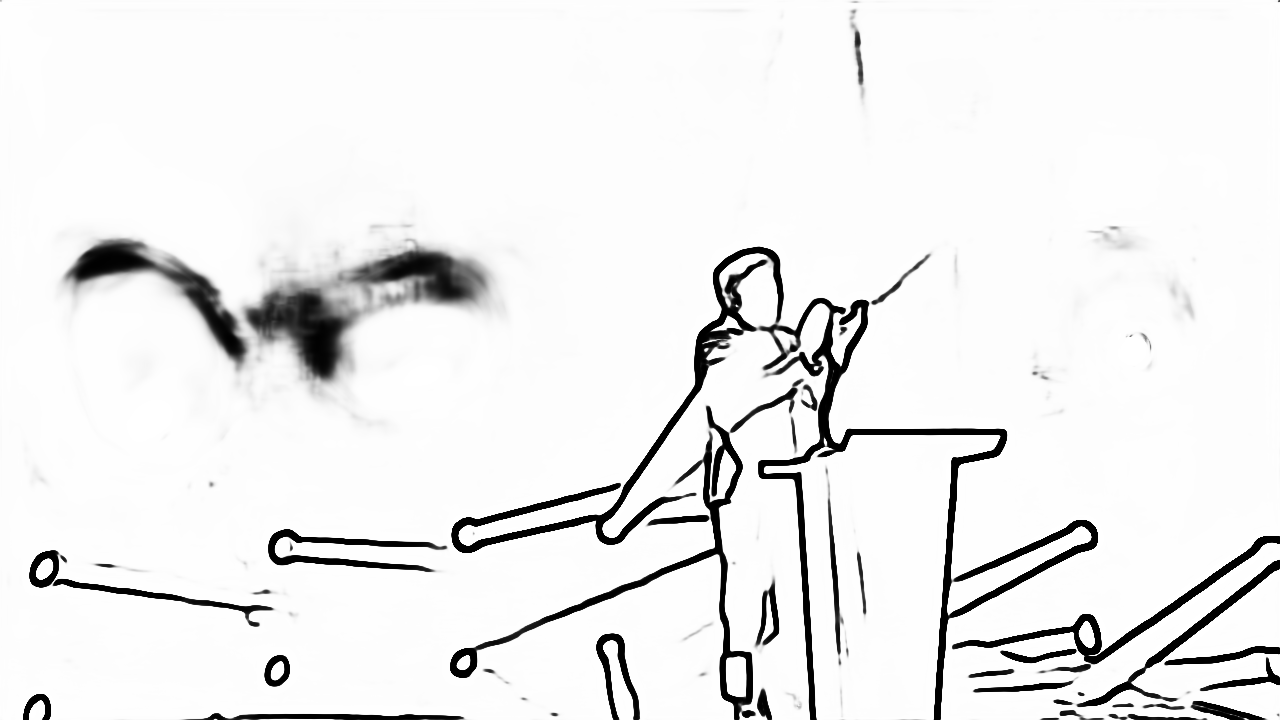

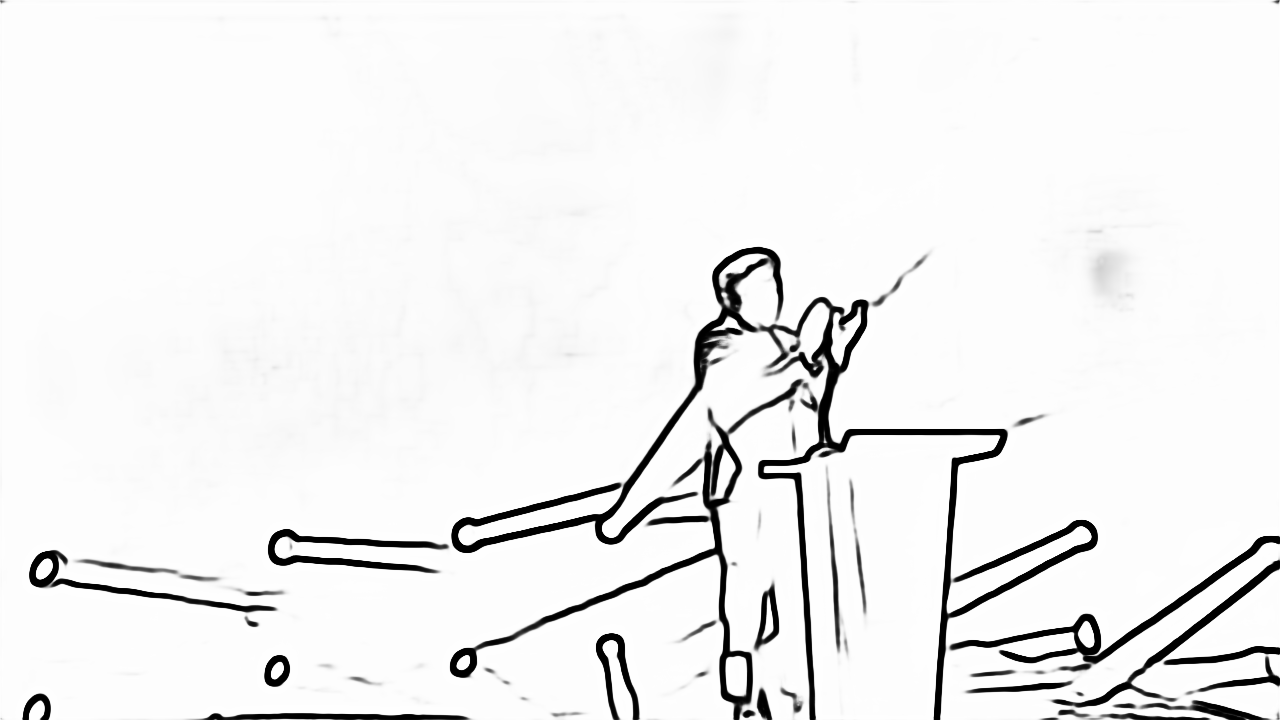

In [ ]:
from PIL import Image
import glob
import os
from IPython.display import clear_output
import shutil

import cv2
import numpy as np

cnt=0
impath = glob.glob("/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/b2/*")
                   
path0 = "/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/val_aug4_200/"
# path1 = "/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/val_aug4_200/"
# path2 = "/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/val_aug3/"
impath = impath[0:]
print(len(impath))

for path in impath:
    if cnt % 1 == 0:
#     if cnt % 20 == 3 or cnt % 20 == 7 or cnt % 20 == 8 or cnt % 20 == 10:
        output_dir_gt = '/home/ubuntu/workspace/kobaco/sketchy/U-2-Net/aug4_sample/'
        if(not os.path.exists(output_dir_gt)):
            os.mkdir(output_dir_gt)

        dst = path.split('/')[-1]
        print(cnt, dst, end = '\r')

        img = Image.open(path)
        img.show()
        img = Image.open(path0+dst)
        img.show()
#         img = Image.open(path1+dst)
#         img.show()
# #         img = Image.open(path2+dst)
#         img.show()
        com = input()
        clear_output()
        
        if com == "s":
            shutil.copy(path, output_dir_gt + dst[:-4]+'.png')
    cnt+=1
#         cv2.imwrite(output_dir_gt + dst[:-4] + '.png', img_nobg)

In [183]:
import torch
x1 = torch.randn(1, 128)
x2 = torch.randn(1, 128)
print(x1)
cos_sim = torch.nn.functional.cosine_similarity(x1, x2)

tensor([[-0.7416,  0.6421,  0.0233,  1.0912, -0.5818,  1.4570, -1.0058, -3.2040,
         -1.1311, -0.4682, -0.9147, -0.1331, -1.2662,  0.7734, -0.0176, -0.7976,
          1.9132, -1.6035, -0.1190, -0.2943,  0.3085, -0.7400, -0.7602,  0.2223,
          0.4231, -0.4107, -1.0827, -0.3024,  1.6923,  0.2049,  1.0805, -0.2449,
          0.5496, -0.0635, -0.6545, -1.6601,  2.2606, -0.1882, -0.3339,  0.3915,
         -0.8767, -0.9415,  1.2982, -0.4995,  1.7324,  0.6227,  0.6499, -0.2403,
          0.9371, -0.3565, -1.6411,  0.4586, -0.6329, -1.0352, -0.9581,  0.8593,
         -0.5715,  1.3530,  0.4166,  0.7166,  0.5503,  0.0658,  0.4590, -1.6640,
          0.7583, -0.2264,  0.2206, -2.1103, -0.2474, -0.9914,  0.1866, -0.2206,
         -0.0396,  0.0852,  0.7984,  0.0053, -0.3235,  0.4988, -1.1175,  0.4273,
         -1.9830, -1.7995,  1.6675, -3.7284,  0.7548, -0.2563, -1.4150, -2.5426,
         -0.1200,  0.8363,  0.0167,  0.7871,  1.2890, -0.8961,  0.3179,  0.1783,
          0.0076, -0.6247,  

In [185]:
cos_sim

tensor([-0.0191])

In [1]:
import json
import requests
dict = {}
dict['csvPath'] = 'csv.csv'
dict['type'] = 'FACE'
# dict['shape'] = ori_img.shape
target_url = 'http://123.214.171.148:10001/face'

response = requests.post(target_url, data=json.dumps(dict))

ConnectionError: HTTPConnectionPool(host='', port=10001): Max retries exceeded with url: /face (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f26e83fdef0>: Failed to establish a new connection: [Errno 110] Connection timed out',))